In this notebook, let us explore the dataset that is given for this competition.

**Objective:**

This dataset contains an anonymized set of variables that describe different Mercedes cars. The ground truth is labeled 'y' and represents the time (in seconds) that the car took to pass testing. 

Let us first import the necessary modules.

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999


In [75]:
train_df = pd.read_csv("C:\\Users\\003XRJ744\\Desktop\\AI-ML\\input\\train.csv")
test_df = pd.read_csv("C:\\Users\\003XRJ744\\Desktop\\AI-ML\\input\\test.csv")
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


Wow the number of rows are small with 388 columns. We should try not to overfit :)

Let us look at the top few rows.

In [16]:

train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

**Target Variable:**

"y" is the variable we need to predict. So let us do some analysis on this variable first.

In [17]:
plt.figure(figsize=(8,6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

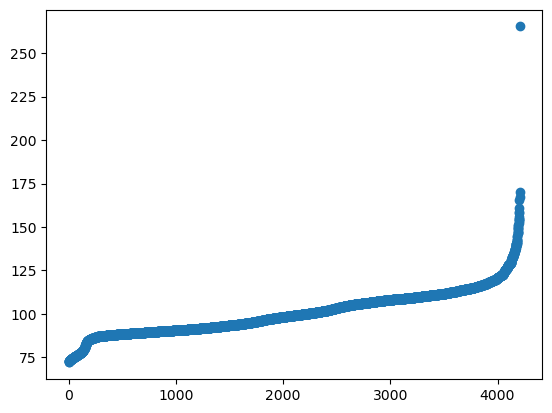

In [18]:
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))


Text(0.5, 0, 'index')

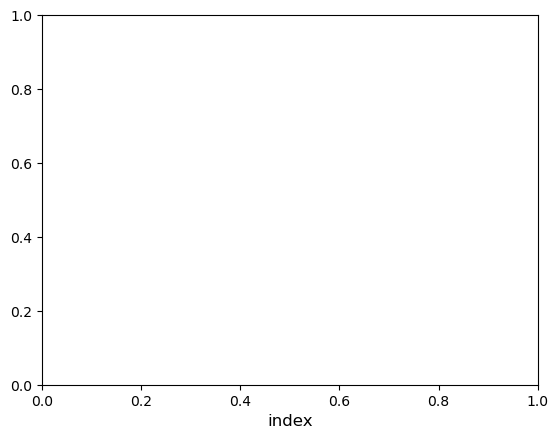

In [19]:
plt.xlabel('index', fontsize=12)


Text(0, 0.5, 'y')

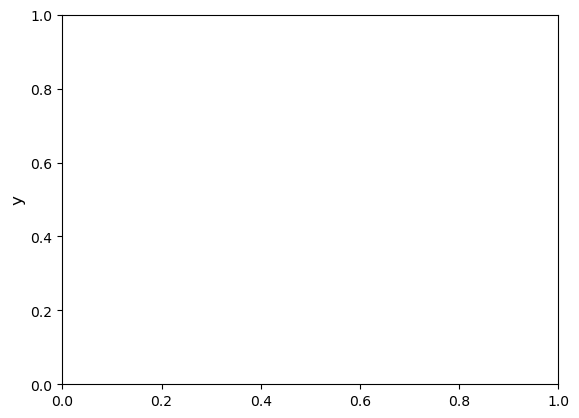

In [41]:
plt.ylabel('y', fontsize=12)


In [24]:
plt.show()

In [25]:
train_df['y']

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

Seems like a single data point is well above the rest. 

Now let us plot the distribution graph.

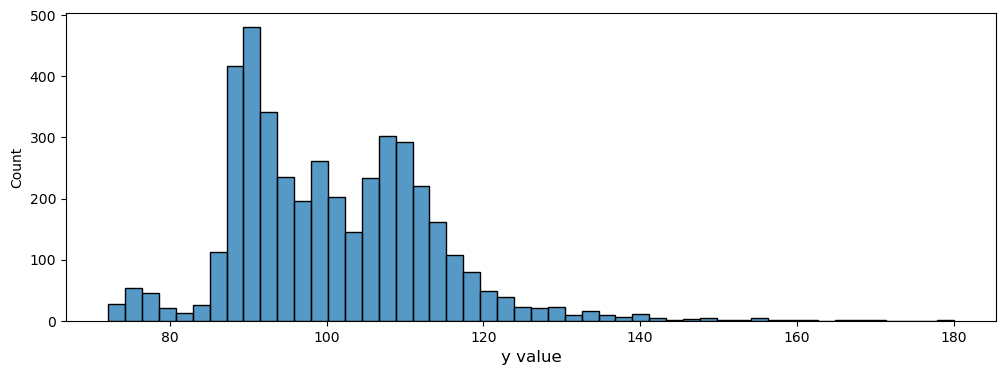

In [43]:
# setting the limit to 180 as after that there is single point and very far in the distribution
ulimit = 180
train_df['y'].values[train_df['y']>ulimit] = ulimit

plt.figure(figsize=(12,4))
sns.histplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

Now let us have a look at the data type of all the variables present in the dataset.

In [44]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


So majority of the columns are integers with 8 categorical columns and 1 float column (target variable)

In [46]:
dtype_df.values[:10,:]

array([['ID', dtype('int64')],
       ['y', dtype('float64')],
       ['X0', dtype('O')],
       ['X1', dtype('O')],
       ['X2', dtype('O')],
       ['X3', dtype('O')],
       ['X4', dtype('O')],
       ['X5', dtype('O')],
       ['X6', dtype('O')],
       ['X8', dtype('O')]], dtype=object)

X0 to X8 are the categorical columns.

**Missing values:**

Let us now check for the missing values.

In [132]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df


,column_name,missing_count


There are no missing values in the dataset :) 

**Integer Columns Analysis:**

In [64]:
unique_values_dict = {}
for col in train_df.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(train_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")
        

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

In [69]:
col_order=np.sort(train_df["X0"].unique()).tolist()

<Axes: xlabel='X0', ylabel='y'>

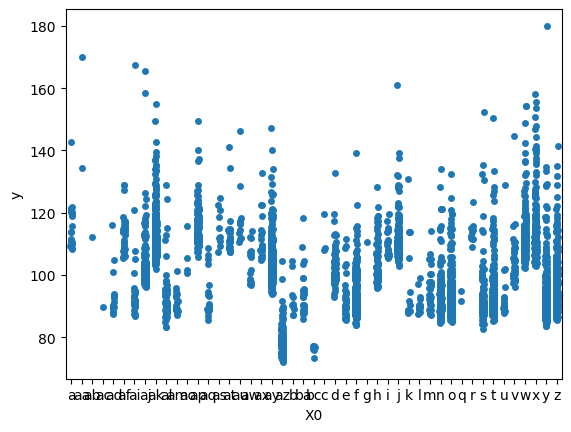

In [70]:
sns.stripplot(x="X0", y='y', data=train_df, order=col_order)

So all the integer columns are binary with some columns have only one unique value 0. Possibly we could exclude those columns in our modeling activity.

Now let us explore the categorical columns present in the dataset.

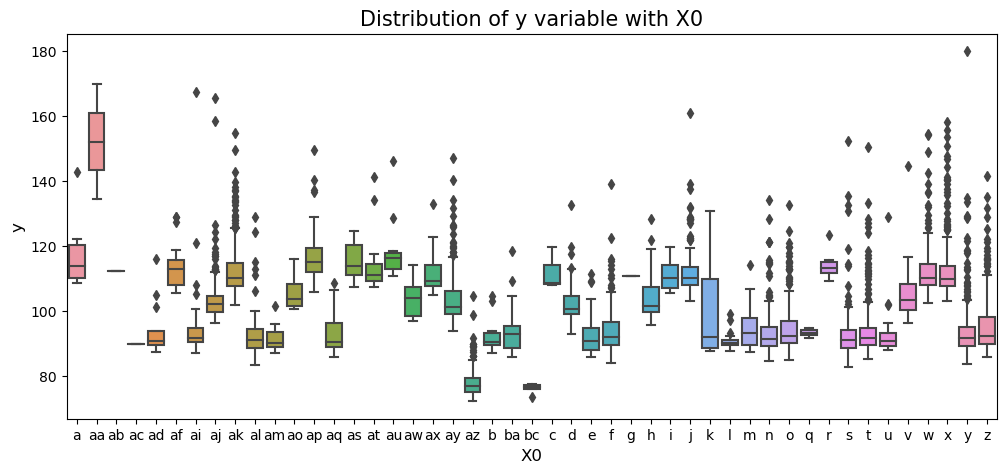

In [147]:
var_name = "X0"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,5))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

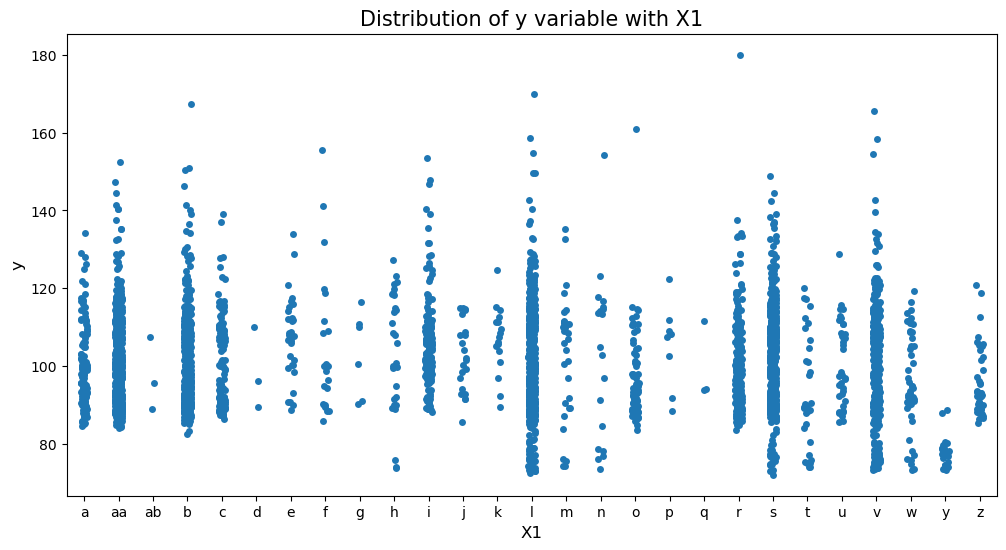

In [137]:
var_name = "X1"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

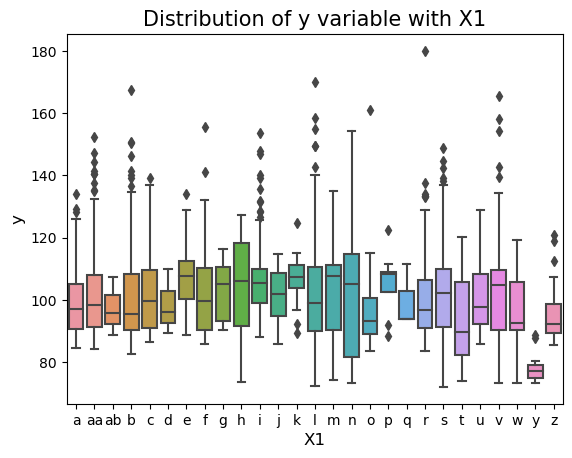

In [138]:
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

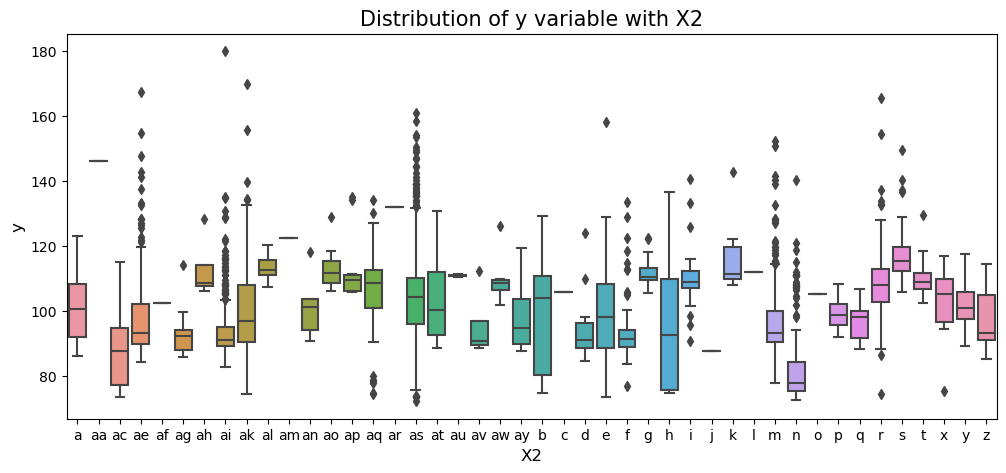

In [135]:
var_name = "X2"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,5))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

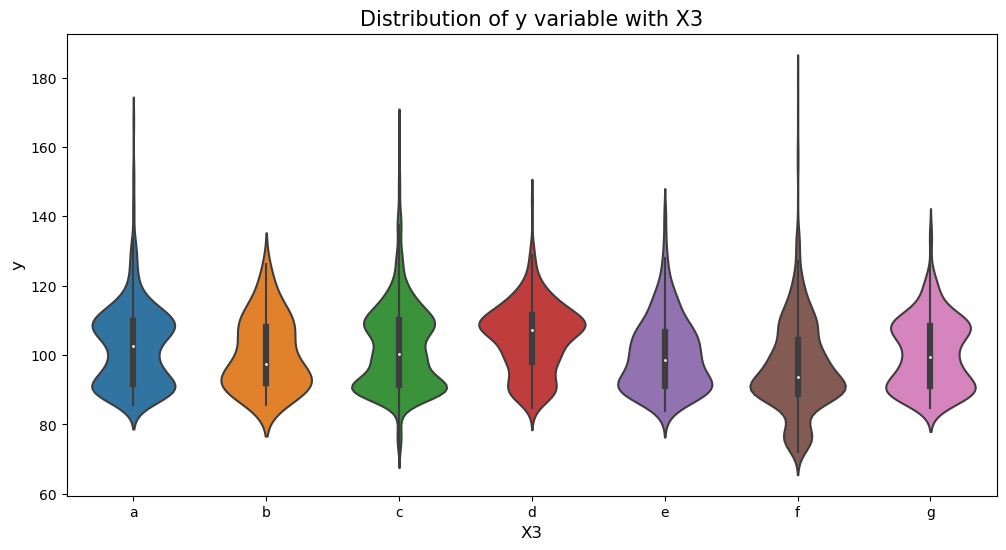

In [139]:
var_name = "X3"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

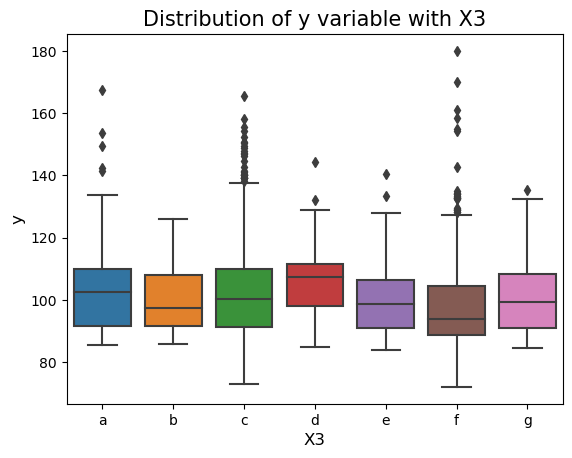

In [140]:
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

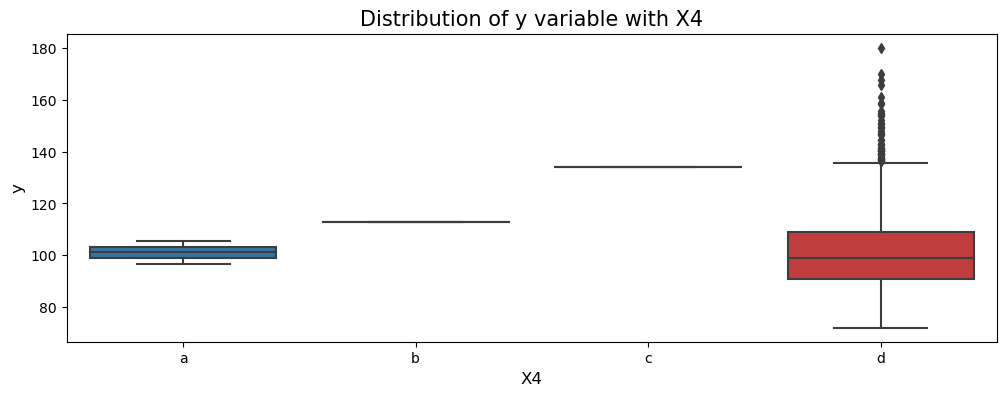

In [142]:
var_name = "X4"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,4))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

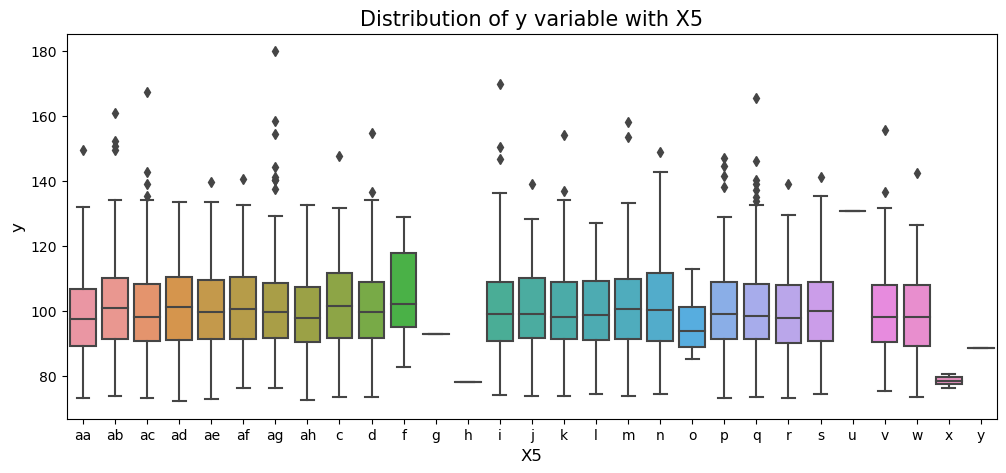

In [143]:
var_name = "X5"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,5))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

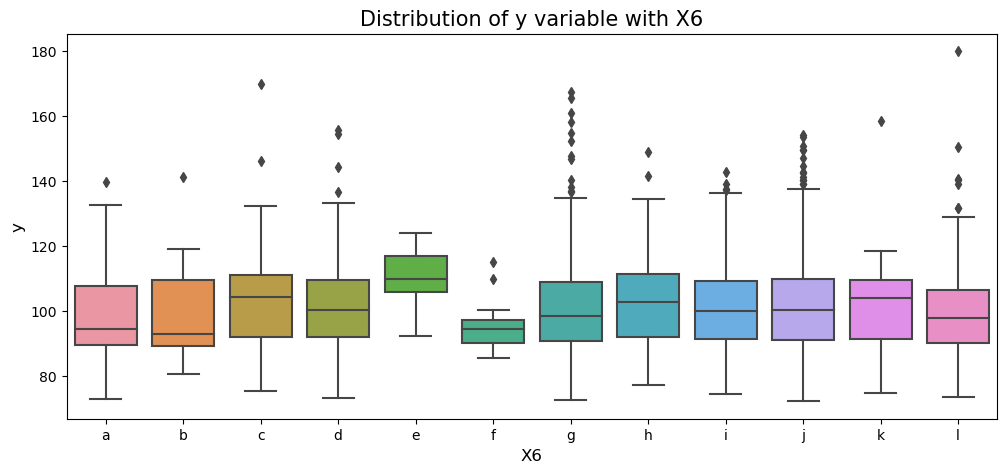

In [144]:
var_name = "X6"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,5))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

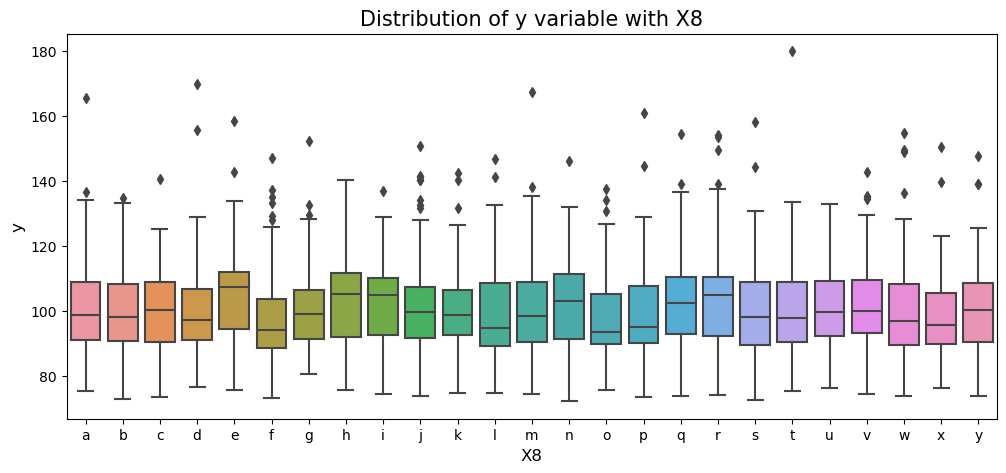

In [145]:
var_name = "X8"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,5))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

**Binary Variables:**

Now we can look into the binary variables. There are quite a few of them as we have seen before. Let us start with getting the number of 0's and 1's in each of these variables.

In [96]:
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
cols_list

['X10',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 'X126',
 'X127',
 'X128',
 'X129',
 'X130',
 'X131',
 'X132',
 'X133',
 'X134',
 'X135',
 'X136

In [97]:
for col in cols_list:
    zero_count_list.append((train_df[col]==0).sum())
    one_count_list.append((train_df[col]==1).sum())

zero_count_list

[4153,
 3893,
 3965,
 2407,
 4207,
 4198,
 4177,
 4176,
 3790,
 3608,
 4198,
 3843,
 4122,
 4201,
 4188,
 1336,
 4072,
 4028,
 4190,
 3231,
 4162,
 4208,
 4186,
 3231,
 4190,
 3231,
 4069,
 4208,
 4206,
 4161,
 4208,
 3905,
 4161,
 3143,
 1695,
 4155,
 4115,
 3695,
 3308,
 1171,
 4031,
 4180,
 4026,
 4187,
 4120,
 4153,
 1789,
 4206,
 4203,
 194,
 4184,
 4161,
 2630,
 4200,
 4095,
 4201,
 3900,
 4083,
 337,
 3773,
 4125,
 3,
 4057,
 4026,
 4156,
 4185,
 4103,
 223,
 3245,
 4137,
 4204,
 3773,
 2491,
 4203,
 4205,
 4179,
 4206,
 4178,
 4202,
 4205,
 4178,
 4208,
 1018,
 4191,
 242,
 4173,
 1304,
 271,
 4180,
 907,
 4201,
 4199,
 4154,
 4147,
 4039,
 4205,
 106,
 4197,
 4115,
 3594,
 3007,
 3381,
 4002,
 1590,
 1590,
 178,
 4179,
 4198,
 4207,
 4196,
 4045,
 2125,
 175,
 3693,
 4034,
 4097,
 1311,
 3686,
 4115,
 4095,
 183,
 1760,
 4037,
 3828,
 4039,
 4149,
 967,
 4048,
 808,
 4203,
 4037,
 4115,
 4020,
 874,
 3849,
 4073,
 4206,
 3330,
 3887,
 1190,
 3019,
 3242,
 4152,
 4204,
 3377,
 

In [98]:
zero_count_list

[4153,
 3893,
 3965,
 2407,
 4207,
 4198,
 4177,
 4176,
 3790,
 3608,
 4198,
 3843,
 4122,
 4201,
 4188,
 1336,
 4072,
 4028,
 4190,
 3231,
 4162,
 4208,
 4186,
 3231,
 4190,
 3231,
 4069,
 4208,
 4206,
 4161,
 4208,
 3905,
 4161,
 3143,
 1695,
 4155,
 4115,
 3695,
 3308,
 1171,
 4031,
 4180,
 4026,
 4187,
 4120,
 4153,
 1789,
 4206,
 4203,
 194,
 4184,
 4161,
 2630,
 4200,
 4095,
 4201,
 3900,
 4083,
 337,
 3773,
 4125,
 3,
 4057,
 4026,
 4156,
 4185,
 4103,
 223,
 3245,
 4137,
 4204,
 3773,
 2491,
 4203,
 4205,
 4179,
 4206,
 4178,
 4202,
 4205,
 4178,
 4208,
 1018,
 4191,
 242,
 4173,
 1304,
 271,
 4180,
 907,
 4201,
 4199,
 4154,
 4147,
 4039,
 4205,
 106,
 4197,
 4115,
 3594,
 3007,
 3381,
 4002,
 1590,
 1590,
 178,
 4179,
 4198,
 4207,
 4196,
 4045,
 2125,
 175,
 3693,
 4034,
 4097,
 1311,
 3686,
 4115,
 4095,
 183,
 1760,
 4037,
 3828,
 4039,
 4149,
 967,
 4048,
 808,
 4203,
 4037,
 4115,
 4020,
 874,
 3849,
 4073,
 4206,
 3330,
 3887,
 1190,
 3019,
 3242,
 4152,
 4204,
 3377,
 

In [99]:

one_count_list

[56,
 316,
 244,
 1802,
 2,
 11,
 32,
 33,
 419,
 601,
 11,
 366,
 87,
 8,
 21,
 2873,
 137,
 181,
 19,
 978,
 47,
 1,
 23,
 978,
 19,
 978,
 140,
 1,
 3,
 48,
 1,
 304,
 48,
 1066,
 2514,
 54,
 94,
 514,
 901,
 3038,
 178,
 29,
 183,
 22,
 89,
 56,
 2420,
 3,
 6,
 4015,
 25,
 48,
 1579,
 9,
 114,
 8,
 309,
 126,
 3872,
 436,
 84,
 4206,
 152,
 183,
 53,
 24,
 106,
 3986,
 964,
 72,
 5,
 436,
 1718,
 6,
 4,
 30,
 3,
 31,
 7,
 4,
 31,
 1,
 3191,
 18,
 3967,
 36,
 2905,
 3938,
 29,
 3302,
 8,
 10,
 55,
 62,
 170,
 4,
 4103,
 12,
 94,
 615,
 1202,
 828,
 207,
 2619,
 2619,
 4031,
 30,
 11,
 2,
 13,
 164,
 2084,
 4034,
 516,
 175,
 112,
 2898,
 523,
 94,
 114,
 4026,
 2449,
 172,
 381,
 170,
 60,
 3242,
 161,
 3401,
 6,
 172,
 94,
 189,
 3335,
 360,
 136,
 3,
 879,
 322,
 3019,
 1190,
 967,
 57,
 5,
 832,
 172,
 1277,
 263,
 19,
 140,
 4,
 1140,
 28,
 102,
 2767,
 25,
 41,
 73,
 94,
 72,
 211,
 2346,
 202,
 665,
 395,
 447,
 17,
 6,
 79,
 2256,
 1770,
 3853,
 1,
 1982,
 10,
 1953,
 49,
 43

In [100]:
N = len(cols_list)
N

356

In [107]:
ind = np.arange(N)
ind
width = 0.35



Show much much 1's and 0's are present in each columns

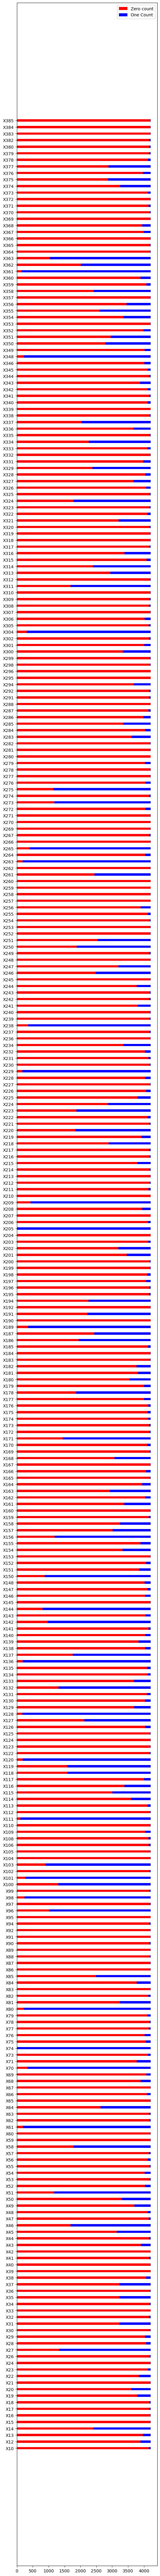

In [148]:
plt.figure(figsize=(6,110))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

Now let us check the mean y value in each of the binary variable.

In [131]:

zero_mean_list = []
one_mean_list = []
cols_list = unique_values_dict['[0, 1]']
cols_list
val = train_df.loc[train_df["X10"]==0]
val.y.mean()

100.6884998796051

C:\Users\003XRJ744\AppData\Local\Temp\ipykernel_28284\2853583530.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  new_df = new_df.pivot('column_name', 'value', 'y_mean')


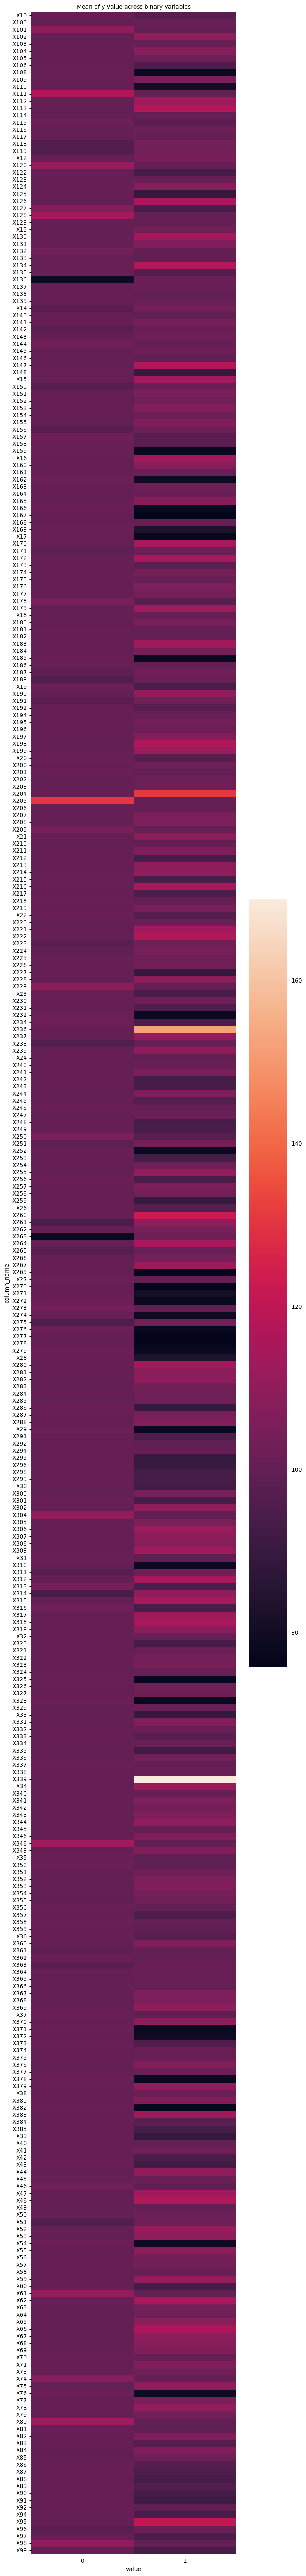

In [133]:
for col in cols_list:
    zero_mean_list.append(train_df.loc[train_df[col]==0].y.mean())
    one_mean_list.append(train_df.loc[train_df[col]==1].y.mean())

new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')

plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=10)
plt.show()

Binary variables which shows a good color difference in the above graphs between 0 and 1 are likely to be more predictive given the the count distribution is also good between both the classes (can be seen from the previous graph). We will dive more into the important variables in the later part of the notebook.

**ID variable:**

One more important thing we need to look at it is ID variable. This will give an idea of how the splits are done across train and test (random or id based) and also to help see if ID has some potential prediction capability (probably not so useful for business)

Let us first see how the 'y' variable changes with ID variable.

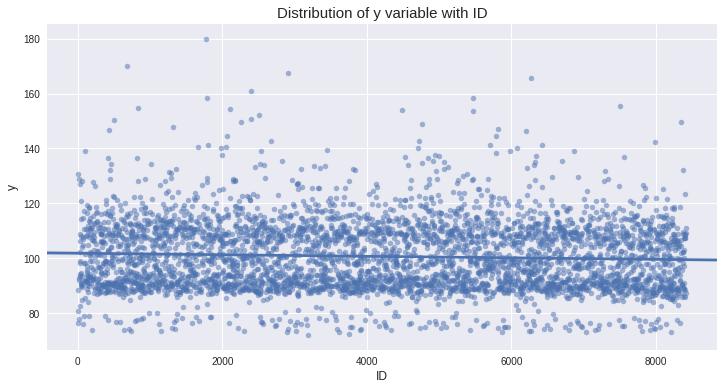

In [20]:
var_name = "ID"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='y', data=train_df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

There seems to be a slight decreasing trend with respect to ID variable. Now let us see how the IDs are distributed across train and test.

<Figure size 600x1000 with 0 Axes>

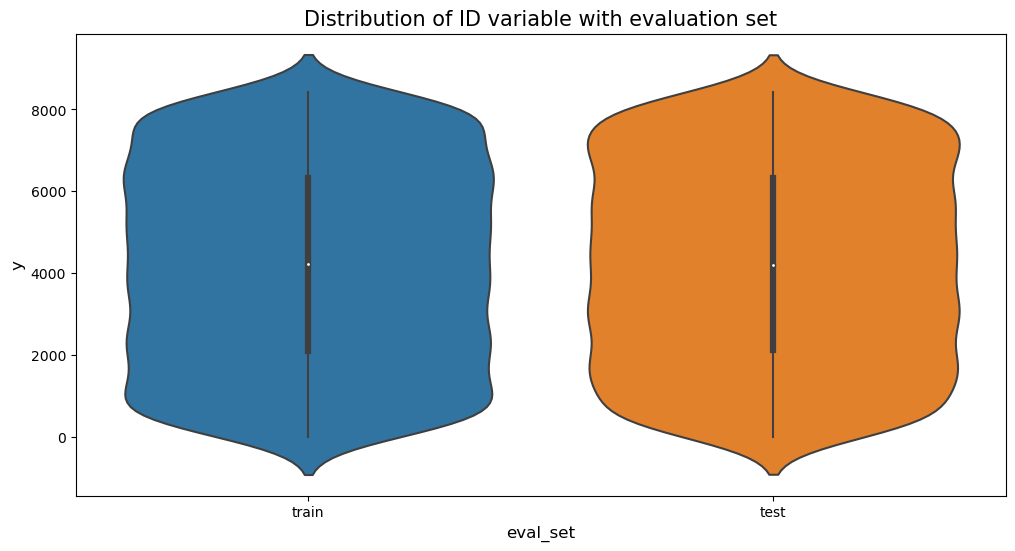

In [87]:
plt.figure(figsize=(6,10))
train_df['eval_set'] = "train"
test_df['eval_set'] = "test"
full_df = pd.concat([train_df[["ID","eval_set"]], test_df[["ID","eval_set"]]], axis=0)

plt.figure(figsize=(12,6))
sns.violinplot(x="eval_set", y='ID', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()